## 特征脸
PCA算法的应用
求出来的成分矩阵的每一行也有n列。如果将每一行也看作样本，那么第一行就是最重要的样本，最能反应原有X矩阵的特征的样本。第二行也能很好的反映原有X矩阵的特征。
在人脸识别中，X的每一行认为是人脸图像，那么W的每一行也可以认为是人脸，是**特征脸**，因为每一张脸都代表了原有所有人脸的一部分特征


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The Labelled Faces
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
# 2914维
faces.data.shape

(13233, 2914)

In [6]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [7]:
# 样本总数，每一个样本都是62*47的图像
faces.images.shape

(13233, 62, 47)

In [8]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

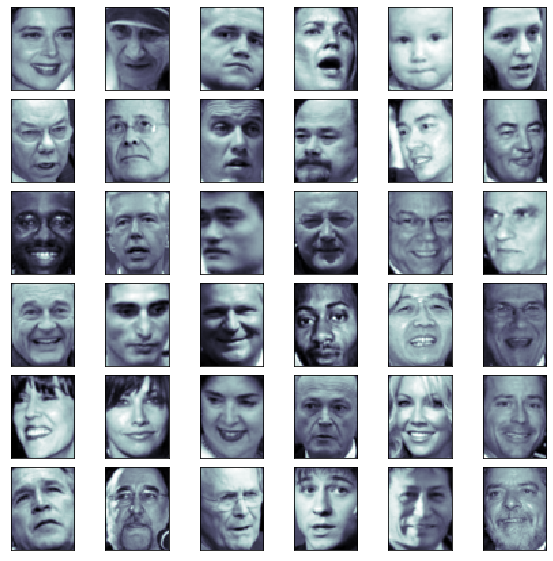

In [9]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

### 特征脸

In [10]:
%%time
from sklearn.decomposition import PCA 
# 随机化，对所有元素进行PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 26 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [11]:
# 2914个主成分，每一个主成分有一个2914的向量
pca.components_.shape

(2914, 2914)

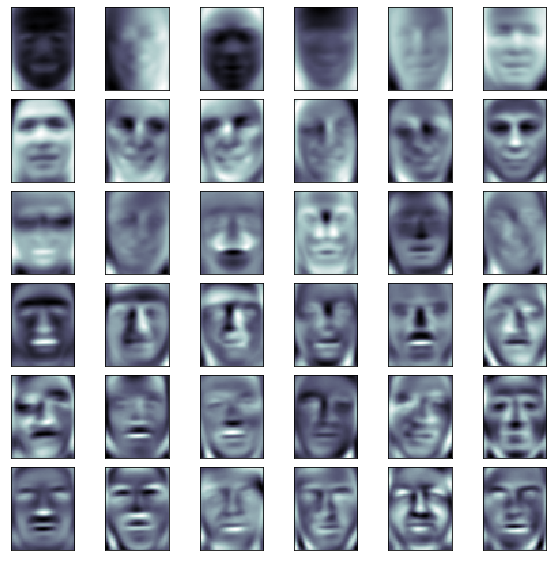

In [12]:
plot_faces(pca.components_[:36,:])
# 特征脸
# 越前面的脸越笼统
# 越后面越清晰

### 更多关于lfw_people数据集

In [13]:
# 最少有60个数据的人脸
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [17]:
faces2.data.shape

(1348, 2914)

In [15]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [16]:
# 有8个人，平均每个人至少有60张脸的数据库
len(faces2.target_names)

8